In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)

1.5.1


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv')
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.duplicated().sum()

172

In [5]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [6]:
df.dropna(inplace = True) # i m going to delete all rows that contain missing values

In [7]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [8]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [9]:
female=df[df['Gender']=='Female']
male=df[df['Gender']=='Male']

In [10]:
female.shape , male.shape

((52576, 12), (51018, 12))

In [11]:
female['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    30107
satisfied                  22469
Name: count, dtype: int64

In [12]:
male['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    28590
satisfied                  22428
Name: count, dtype: int64

In [13]:
female['Type of Travel'].value_counts()

Type of Travel
Business travel    36433
Personal Travel    16143
Name: count, dtype: int64

In [14]:
male['Type of Travel'].value_counts()

Type of Travel
Business travel    35032
Personal Travel    15986
Name: count, dtype: int64

In [15]:
female['Class'].value_counts()

Class
Business    24868
Eco         23776
Eco Plus     3932
Name: count, dtype: int64

In [16]:
male['Class'].value_counts()

Class
Business    24665
Eco         22817
Eco Plus     3536
Name: count, dtype: int64

In [17]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [18]:
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

<Axes: xlabel='Customer Type', ylabel='count'>

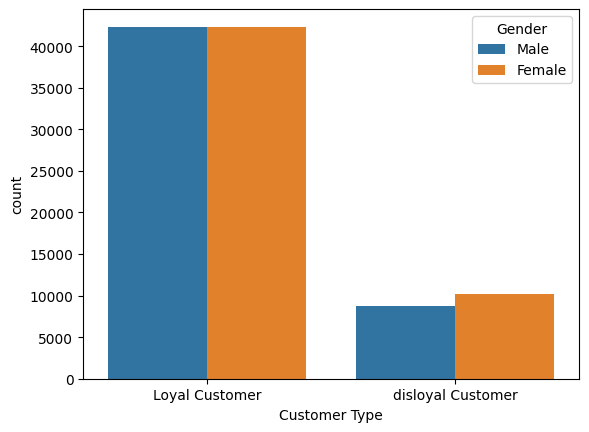

In [19]:
sns.countplot(x='Customer Type', data = df , hue='Gender')

<Axes: xlabel='satisfaction', ylabel='count'>

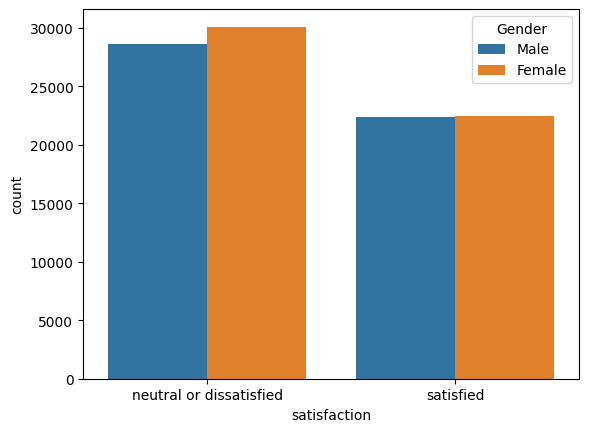

In [20]:
sns.countplot(x='satisfaction', data = df , hue='Gender')

<Axes: xlabel='Class', ylabel='count'>

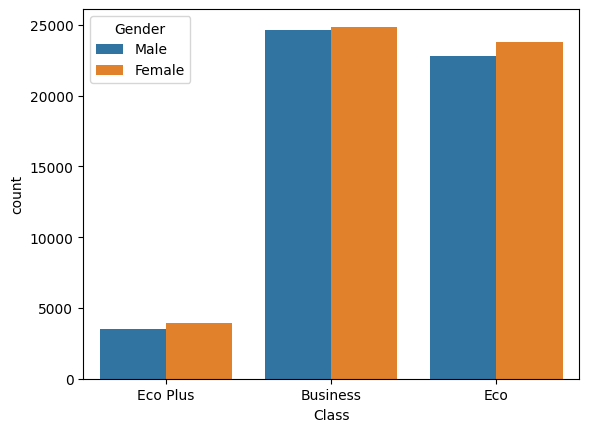

In [21]:
sns.countplot(x='Class', data = df , hue='Gender')

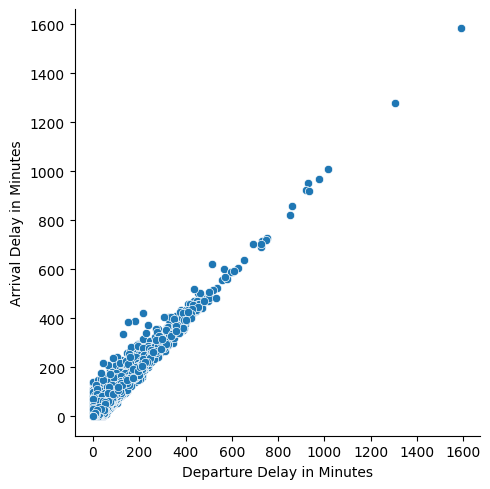

In [22]:
sns.relplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data= df)

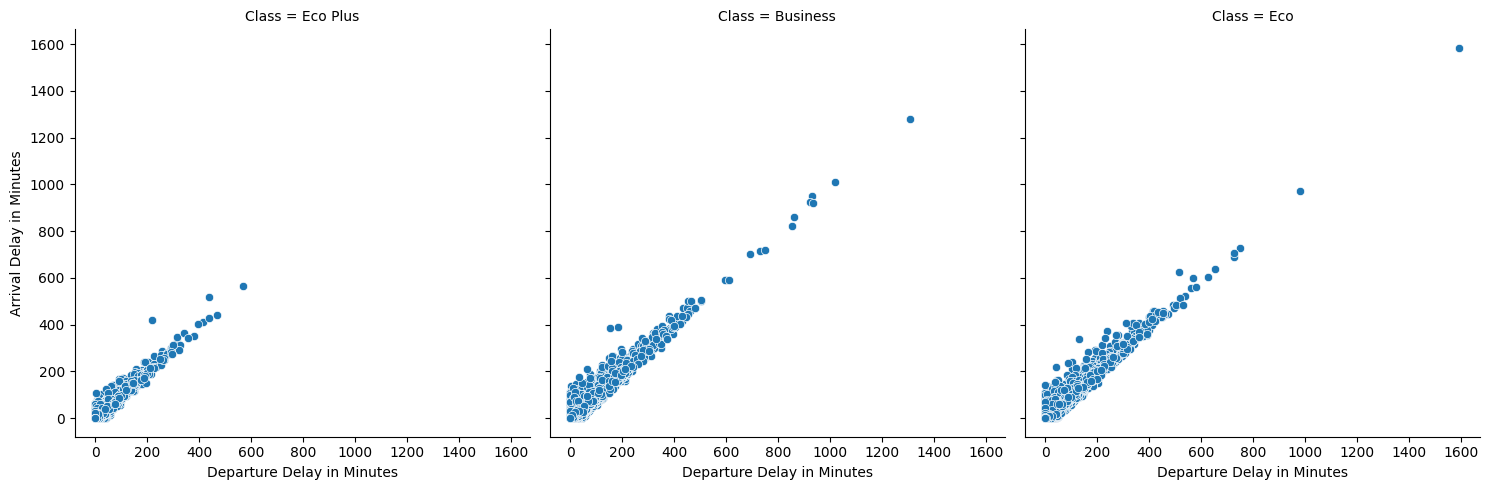

In [23]:
sns.relplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data= df, col = 'Class')

In [24]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [25]:
df['Age'].min()

7

In [26]:
df['Age'].max()

85

<Axes: xlabel='Age', ylabel='Count'>

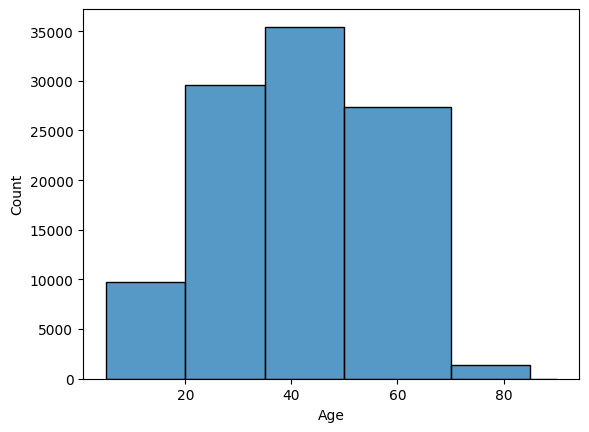

In [27]:
sns.histplot(df['Age'], bins=[5,20,35,50,70,85,90])

<Axes: xlabel='Inflight entertainment', ylabel='count'>

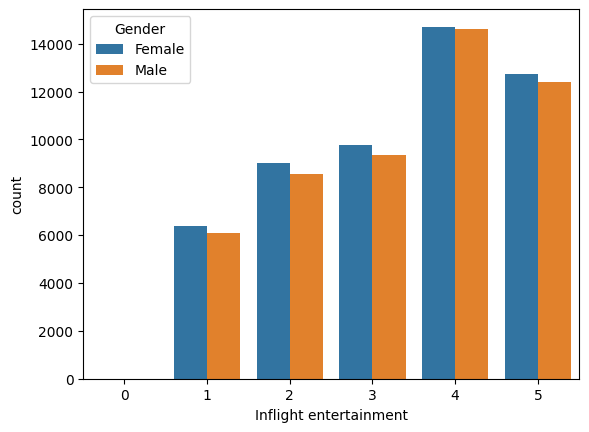

In [28]:
sns.countplot(x='Inflight entertainment', data = df , hue='Gender')

<Axes: xlabel='Baggage handling', ylabel='count'>

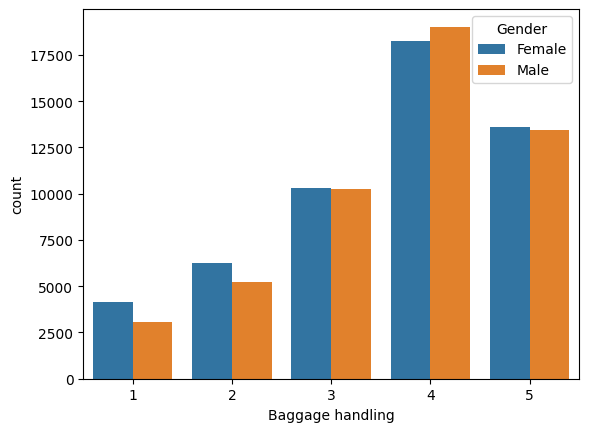

In [29]:
sns.countplot(x='Baggage handling', data = df , hue='Gender')

<Axes: xlabel='Cleanliness', ylabel='count'>

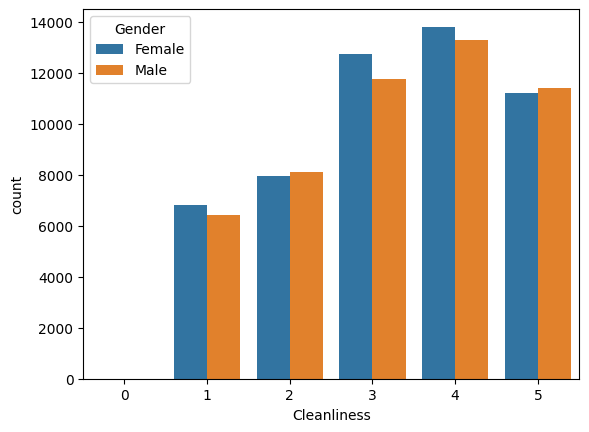

In [30]:
sns.countplot(x='Cleanliness', data = df , hue='Gender')

In [31]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


Text(0.5, 1.0, 'Balance or imblance')

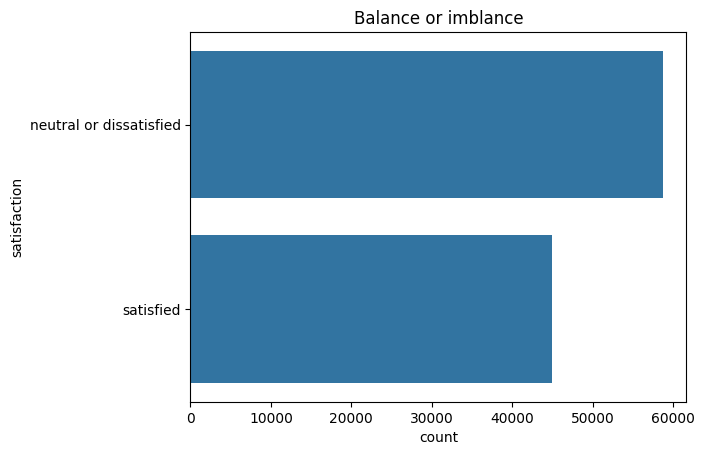

In [32]:
sns.countplot(df['satisfaction']) 
plt.title('Balance or imblance')

In [74]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [75]:
# onehot encoding
df2=pd.get_dummies(df, drop_first="if_binary").astype(int)

In [76]:
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [35]:
df2.isnull().sum()

Age                                0
Flight Distance                    0
Inflight entertainment             0
Baggage handling                   0
Cleanliness                        0
Departure Delay in Minutes         0
Arrival Delay in Minutes           0
Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
Class_Eco                          0
Class_Eco Plus                     0
satisfaction_satisfied             0
dtype: int64

In [36]:
# x and y split , independent and dependent variable
x= df2.drop('satisfaction_satisfied', axis = "columns") # independent variable
y = df2[['satisfaction_satisfied']]  # target variable

In [37]:
# training nd testing split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x , y, test_size=0.2)


In [38]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
89683,43,2929,5,5,3,0,0,0,0,0,0,0
7843,60,305,3,5,3,0,0,1,0,1,1,0
83568,33,354,5,2,5,0,0,1,0,0,0,0
17708,29,3095,2,4,2,0,8,0,0,0,0,0
49328,70,101,2,2,4,0,0,0,0,1,0,0


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lgr = LogisticRegression()

In [41]:
y_train.values.ravel()

array([1, 0, 1, ..., 0, 0, 0])

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
lgr.fit(x_train , y_train) # train the algorithm

LogisticRegression()

In [44]:
print("Training score: ",lgr.score(x_train,y_train)*100)
print("Testing_score: ",lgr.score(x_test, y_test)*100)

Training score:  79.81779788838612
Testing_score:  79.9507698247985


In [45]:
pred = lgr.predict(x_test)

In [46]:
x_test.shape

(20719, 12)

In [47]:
pred

array([0, 1, 1, ..., 1, 0, 1])

In [48]:
y_test['prediction'] = pred

In [49]:
y_test.head(40)

,satisfaction_satisfied,prediction
63094,0,0
50530,0,1
66777,1,1
98715,1,1
10722,1,1
12975,0,0
39924,0,0
7810,1,0
49035,1,1
23331,0,0


In [50]:
## model evaluation

from sklearn.metrics  import confusion_matrix , classification_report

In [51]:
# confusion metrics
matrix = confusion_matrix(y_test['satisfaction_satisfied'] , y_test['prediction'])

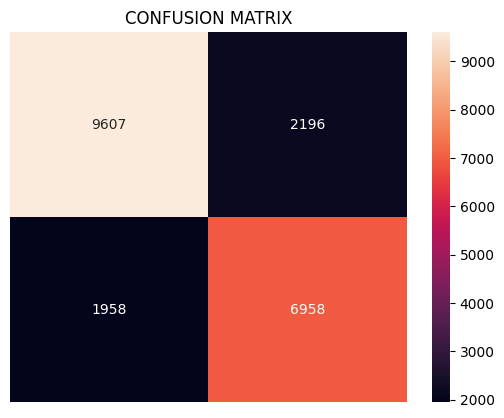

In [52]:
from sklearn.metrics  import confusion_matrix , classification_report
matrix = confusion_matrix(y_test['satisfaction_satisfied'] , y_test['prediction'])
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix , annot=True , fmt = 'd')
plt.title("CONFUSION MATRIX")
plt.axis('off')
plt.show()

In [53]:
import os
import joblib
os.makedirs('models' , exist_ok=True)
joblib.dump(lgr , './models/logisticregre.lb')
print('your model is saved')

your model is saved


In [54]:
print(classification_report(y_test['satisfaction_satisfied'], y_test['prediction']))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     11803
           1       0.76      0.78      0.77      8916

    accuracy                           0.80     20719
   macro avg       0.80      0.80      0.80     20719
weighted avg       0.80      0.80      0.80     20719



In [55]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
89683,43,2929,5,5,3,0,0,0,0,0,0,0
7843,60,305,3,5,3,0,0,1,0,1,1,0
83568,33,354,5,2,5,0,0,1,0,0,0,0
17708,29,3095,2,4,2,0,8,0,0,0,0,0
49328,70,101,2,2,4,0,0,0,0,1,0,0


In [56]:
y_train.head()

,satisfaction_satisfied
89683,1
7843,0
83568,1
17708,0
49328,1


In [57]:
x_test.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
63094,46,343,3,4,3,0,8,1,0,1,1,0
50530,34,795,2,2,4,0,0,0,0,0,0,0
66777,31,3874,3,5,3,4,13,1,0,0,0,0
98715,33,1812,5,5,5,0,0,0,0,0,0,0
10722,22,749,4,4,4,0,0,0,0,0,0,1


In [58]:
y_test.head()

,satisfaction_satisfied,prediction
63094,0,0
50530,0,1
66777,1,1
98715,1,1
10722,1,1


In [59]:
### Try with decision tree and random forest 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [60]:
dtc = DecisionTreeClassifier
rdf = RandomForestRegressor

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train and y_train are already defined and cleaned
dtc = DecisionTreeClassifier()
rdf = RandomForestClassifier()

# Training the models
dtc.fit(x_train, y_train)
rdf.fit(x_train, y_train)

print("Your algorithms are trained")


Your algorithms are trained


In [62]:
print("Decision tree score ") 
print("Training score : ",dtc.score(x_train,y_train)*100 )
print("Testing score : " ,dtc.score(x_test,y_test['satisfaction_satisfied'])*100)

print("Random forest score")
print("Training score : ",rdf.score(x_train,y_train)*100 )
print("Testing score : " ,rdf.score(x_test,y_test['satisfaction_satisfied'])*100)

Decision tree score 
Training score :  99.96983408748115
Testing score :  81.6110816159081
Random forest score
Training score :  99.96380090497738
Testing score :  87.20980742313819


In [63]:
import os
import joblib
os.makedirs('models' , exist_ok=True)
joblib.dump(lgr , './models/decisionTree.lb')
joblib.dump(lgr , './models/Randomforest.lb')
print('your model is saved')

your model is saved


In [64]:
## hyperparameter turning
rdf2 = RandomForestClassifier(n_estimators=85,max_depth=14,min_samples_split=40)

In [65]:
rdf2.fit(x_train ,y_train)

RandomForestClassifier(max_depth=14, min_samples_split=40, n_estimators=85)

In [66]:
print("Random forest score")
print("Training score : ",rdf2.score(x_train,y_train)*100 )
print("Testing score : " ,rdf2.score(x_test,y_test['satisfaction_satisfied'])*100)

Random forest score
Training score :  88.66726998491704
Testing score :  88.33920556011391


In [67]:
## hyperparameter turning
rdf3 = RandomForestClassifier(n_estimators=150,max_depth=14,min_samples_split=40)

In [68]:
rdf3.fit(x_train ,y_train)

RandomForestClassifier(max_depth=14, min_samples_split=40, n_estimators=150)

In [69]:
print("Random forest score")
print("Training score : ",rdf3.score(x_train,y_train)*100 )
print("Testing score : " ,rdf3.score(x_test,y_test['satisfaction_satisfied'])*100)

Random forest score
Training score :  88.72398190045249
Testing score :  88.38264394999759


In [70]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [71]:
from sklearn.ensemble import RandomForestClassifier
rdf4 = RandomForestClassifier()

In [72]:
parameters = {'n_estimators': [85,95,120,155],
              'max_depth': [10,15,20,25],
              'min_samples_split': [40,30,50]}

gridsearchcv=GridSearchCV(estimator=rdf4 , param_grid=parameters)

In [73]:
gridsearchcv.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
rdf5=RandomForestClassifier(max_depth = 20, min_samples_split= 50, n_estimators = 120)